In [49]:
import pandas as pd
import os
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport
os.chdir("C:/Users/ashut/Desktop/Jupyter")

In [50]:
wine_reviews=pd.read_csv("data/winemag-data-130k-v2.csv",index_col=0)
#wine_reviews_second=pd.read_csv("data/winemag-data_first150k.csv",index_col=0)

## EDA

In [51]:
profile=ProfileReport(df,explorative=True,dark_mode=True)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Dataset

In [52]:
wine_reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Creating copies of dataset

In [53]:
data=wine_reviews.copy()

In [54]:
df=wine_reviews.copy()
reviews=df.copy()

In [55]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [57]:
wine_reviews.isna().sum().sum()

204752

In [58]:
data.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### Filling missing values

In [59]:
for column in ('designation','region_1','region_2','taster_name','taster_twitter_handle'):
    data[column]=data[column].fillna('Unknown')
data['price']=data['price'].fillna(data['price'].mean())

In [60]:
data.isna().sum()

country                  63
description               0
designation               0
points                    0
price                     0
province                 63
region_1                  0
region_2                  0
taster_name               0
taster_twitter_handle     0
title                     0
variety                   1
winery                    0
dtype: int64

In [61]:
data['province'].describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

In [62]:
wine_reviews.country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

In [63]:
print(wine_reviews['country'].value_counts())

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [64]:
wine_reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [65]:
print(wine_reviews['taster_name'].value_counts())

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


In [66]:
df.memory_usage()

Index                    1039768
country                  1039768
description              1039768
designation              1039768
points                   1039768
price                    1039768
province                 1039768
region_1                 1039768
region_2                 1039768
taster_name              1039768
taster_twitter_handle    1039768
title                    1039768
variety                  1039768
winery                   1039768
dtype: int64

In [67]:
pd.crosstab(index=df['price'],columns=df['country'],dropna=True)

country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
price,,,,,,,,,,,,,,,,,,,,,
4.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,5,0,0
5.0,3,0,4,0,0,0,0,0,4,0,...,0,0,0,1,4,0,0,13,0,0
6.0,11,0,2,0,0,0,0,0,10,0,...,0,0,0,1,15,0,0,30,3,0
7.0,19,0,11,1,0,0,0,0,52,0,...,0,0,3,1,45,0,0,116,0,0
8.0,54,0,38,0,0,0,5,0,123,0,...,0,0,0,11,133,0,0,253,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
pd.crosstab(index=df['points'],columns=df['country'],dropna=True)

country,Argentina,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,...,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
points,,,,,,,,,,,,,,,,,,,,,
80,76,0,2,0,0,3,1,0,50,0,...,0,0,0,0,78,0,0,157,0,2
81,94,0,16,0,0,2,0,0,80,0,...,0,0,0,0,93,0,0,326,0,2
82,149,0,19,6,0,6,1,2,158,0,...,0,0,1,5,214,0,0,1010,2,5
83,285,0,65,9,0,5,3,3,288,0,...,0,0,1,12,348,1,0,1313,3,4
84,409,0,117,28,0,5,6,4,456,0,...,0,0,2,65,496,0,5,2676,5,11
85,422,0,171,89,1,11,7,7,582,0,...,0,0,2,130,641,0,2,3684,2,10
86,422,0,177,141,0,10,14,11,681,0,...,4,0,6,195,808,0,13,4926,1,6
87,472,1,288,213,0,3,20,30,691,0,...,2,1,17,233,919,0,17,6632,0,23
88,391,1,263,354,1,5,13,34,508,0,...,2,0,17,188,839,0,12,7039,1,20


<AxesSubplot:xlabel='price', ylabel='points'>

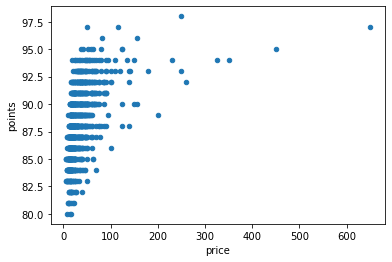

In [85]:
reviews[reviews['price']<1000].sample(1000).plot.scatter(x='price', y='points')

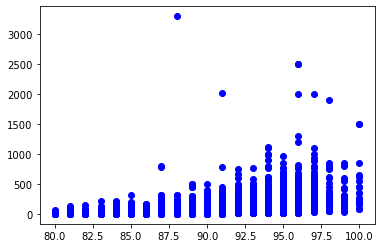

In [70]:
plt.scatter(df['points'],df['price'],c='blue')

In [71]:
wine_reviews.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [72]:
print(wine_reviews['variety'].value_counts())

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64


In [73]:
df_copy=df.copy(deep=True)

In [74]:
df.dropna(subset=["price","country",'province'])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [75]:
Country=df['country']

In [76]:
dic=wine_reviews['country'].value_counts()

<AxesSubplot:>

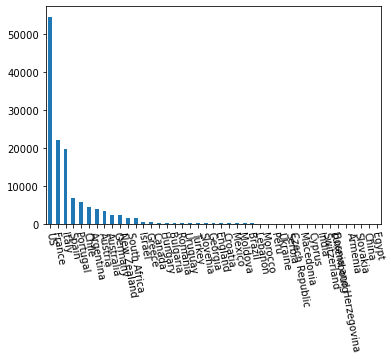

In [77]:
dic.plot.bar( rot=100000)

<AxesSubplot:ylabel='country'>

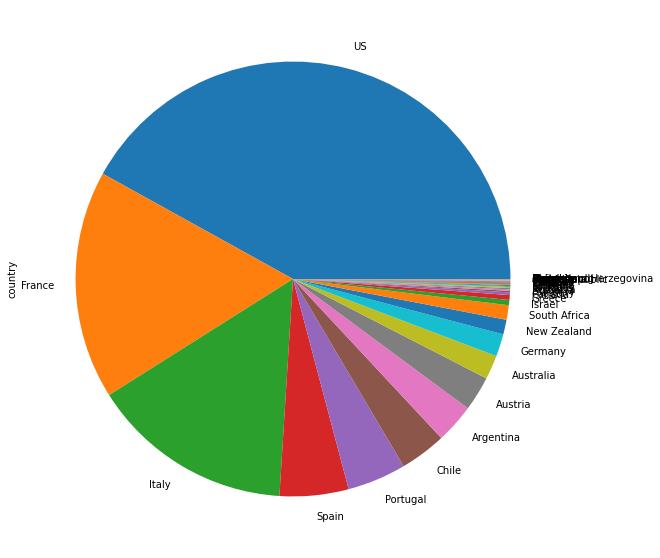

In [78]:
dic.plot.pie(figsize=(10, 10))

In [79]:
Variety=(df['variety'].value_counts())

<AxesSubplot:ylabel='variety'>

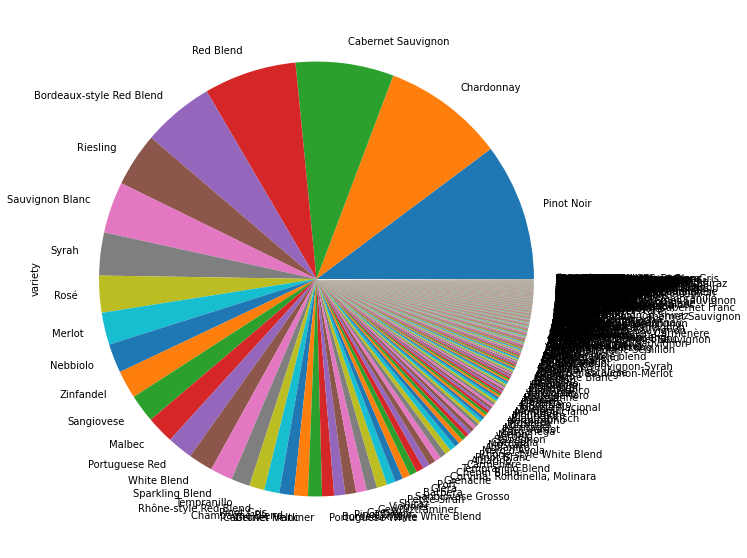

In [80]:
Variety.plot.pie(figsize=(10, 10))

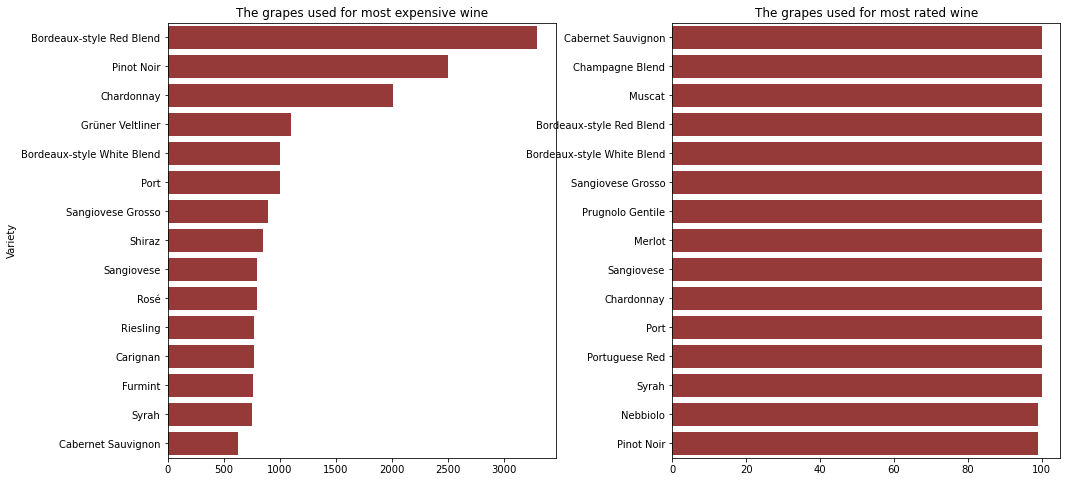

In [82]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()
w = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sb.barplot(x = w['price'], y = w.index, color='brown',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
w = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sb.barplot(x = w['points'], y = w.index, color='brown',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

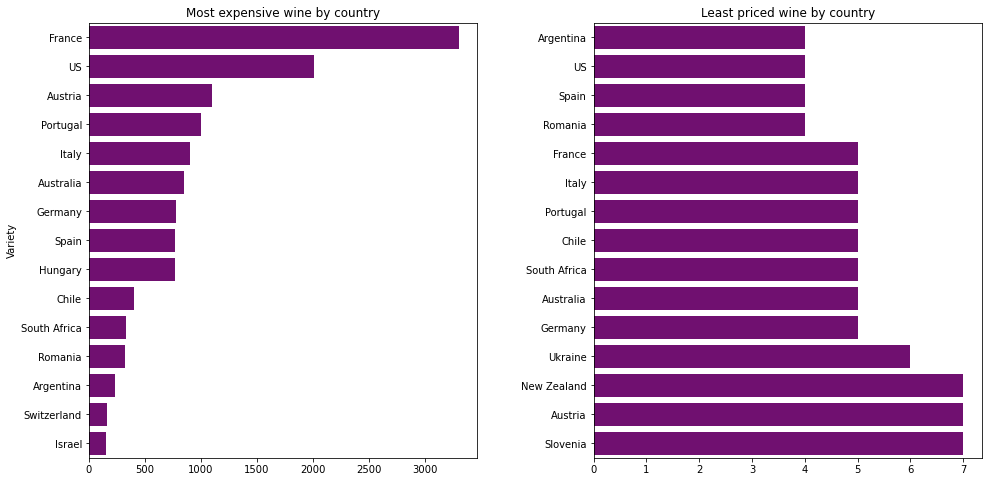

In [83]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()
w = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sb.barplot(x = w['price'], y = w.index, color='purple',ax=ax1)
ax1.set_title('Most expensive wine by country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
w = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sb.barplot(x = w['price'], y = w.index, color='purple',ax=ax2)
ax2.set_title('Least priced wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);